# Exploratory data analysis (EDA) on bike sales dataset

In [ ]:
import pandas as pd

df = pd.read_csv('../../data/Sales.csv', index_col=0, parse_dates=True)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086


In [31]:
split_in_age_groups_and_country = (
    df.groupby(["Age_Group", "Country", "Year"])
        .agg(
            avg_revenue_per_age_group=("Revenue", "mean"),
            total_revenue_per_age_group=("Revenue", "sum")
        )
        .reset_index()
        .sort_values(by=["Country", "Age_Group"], ascending=[True, False])
)

split_in_age_groups_and_country

,Age_Group,Country,Year,avg_revenue_per_age_group,total_revenue_per_age_group
102,Youth (<25),Australia,2011,2533.963303,552404
103,Youth (<25),Australia,2012,2589.110092,564426
104,Youth (<25),Australia,2013,802.495430,877930
105,Youth (<25),Australia,2014,391.577929,344197
106,Youth (<25),Australia,2015,1139.097806,1246173
...,...,...,...,...,...
31,Adults (35-64),United States,2012,3822.394068,1804170
32,Adults (35-64),United States,2013,543.181985,2363928
33,Adults (35-64),United States,2014,515.204191,3171597
34,Adults (35-64),United States,2015,693.835478,3019572


In [ ]:
country = df.groupby("Country").agg(
    avg_revenue=("Revenue", "mean"),
    total_revenue=("Revenue", "sum"),
    num_rows=("Revenue", "count")
)

country.sort_values(by="avg_revenue", ascending=False)



,avg_revenue,total_revenue,num_rows
Country,,,
Australia,889.959016,21302059,23936
Canada,559.721964,7935738,14178
France,766.764139,8432872,10998
Germany,809.028293,8978596,11098
United Kingdom,781.659031,10646196,13620
United States,713.552696,27975547,39206


In [39]:
import duckdb as db

df = db.query(
    """
    SELECT 
        country,
        AVG(Profit) AS profit_per_country
    FROM 
        df
    GROUP BY
        1
    """
).df()

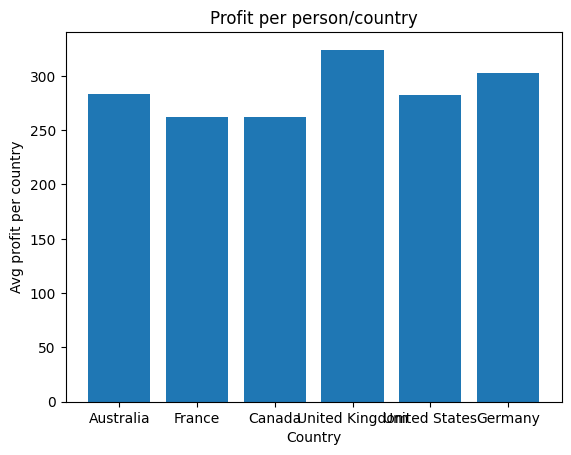

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)

ax.bar(x=df["Country"], height=df["profit_per_country"])
ax.set(xlabel="Country", ylabel="Avg profit per country", title="Profit per person/country")
fig.savefig("avg_profit_per_country.png")

In [ ]:
df.groupby("Country")[["profit_per_country", ]].mean()

Country
Australia         283.089489
Canada            262.187615
France            261.891435
Germany           302.756803
United Kingdom    324.071439
United States     282.447687
Name: profit_per_country, dtype: float64